In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


The Boston housing dataset contains the following columns:

CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX: Nitric oxides concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centres
RAD: Index of accessibility to radial highways
TAX: Full-value property-tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT: Percentage lower status of the population
MEDV: Median value of owner-occupied homes in $1000's

In [2]:
file_path = 'C:/Users/Fatima Hassan/Downloads/boston - boston.csv'
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The dataset has 506 entries and no missing values, which is good for linear regression analysis. All columns are numerical, either float64 or int64 types. This indicates that there's no immediate need for encoding categorical variables. However, the range of values across different features varies significantly, suggesting that normalization or standardization might be beneficial for linear regression.

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


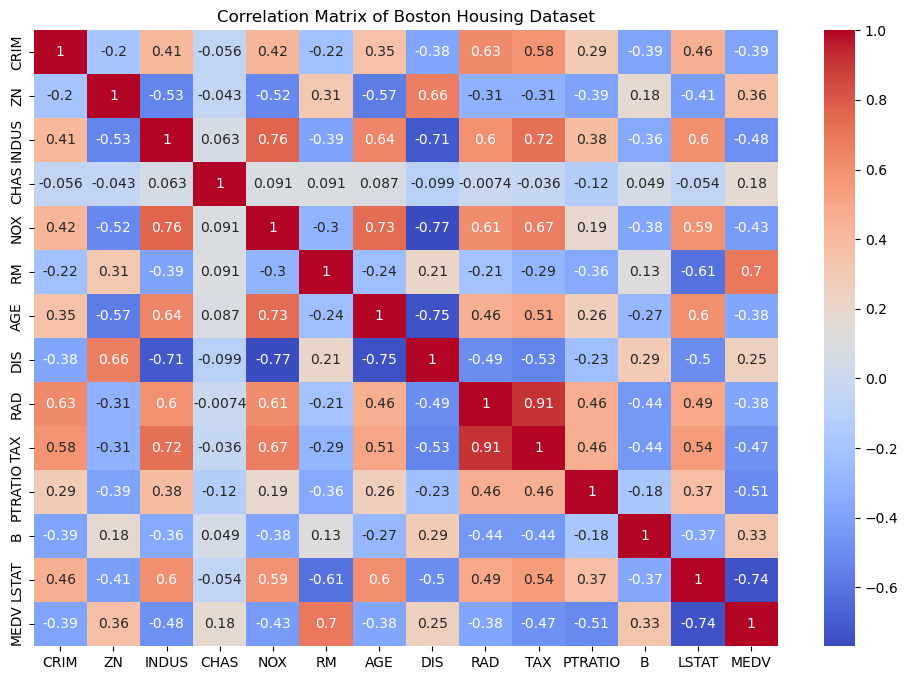

In [6]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Boston Housing Dataset")
plt.show()

The heatmap of the correlation matrix provides insights into how each feature is related to the others, especially the target variable MEDV:

High Positive Correlation with MEDV: Features like RM (average number of rooms per dwelling) show a strong positive correlation. This means that as the number of rooms increases, the median value of homes tends to increase.

High Negative Correlation with MEDV: Features like LSTAT (percentage lower status of the population) and PTRATIO (pupil-teacher ratio by town) show a strong negative correlation with MEDV. A higher value in these features tends to correspond to a lower median value of homes.

Weak Correlation: Some features like CHAS (Charles River dummy variable) have weak correlations with MEDV, indicating they might not be very significant in predicting the median value of homes.

Multicollinearity: Certain features, like RAD (index of accessibility to radial highways) and TAX (full-value property-tax rate), show high correlation with each other. This multicollinearity might affect the performance of a linear regression model.

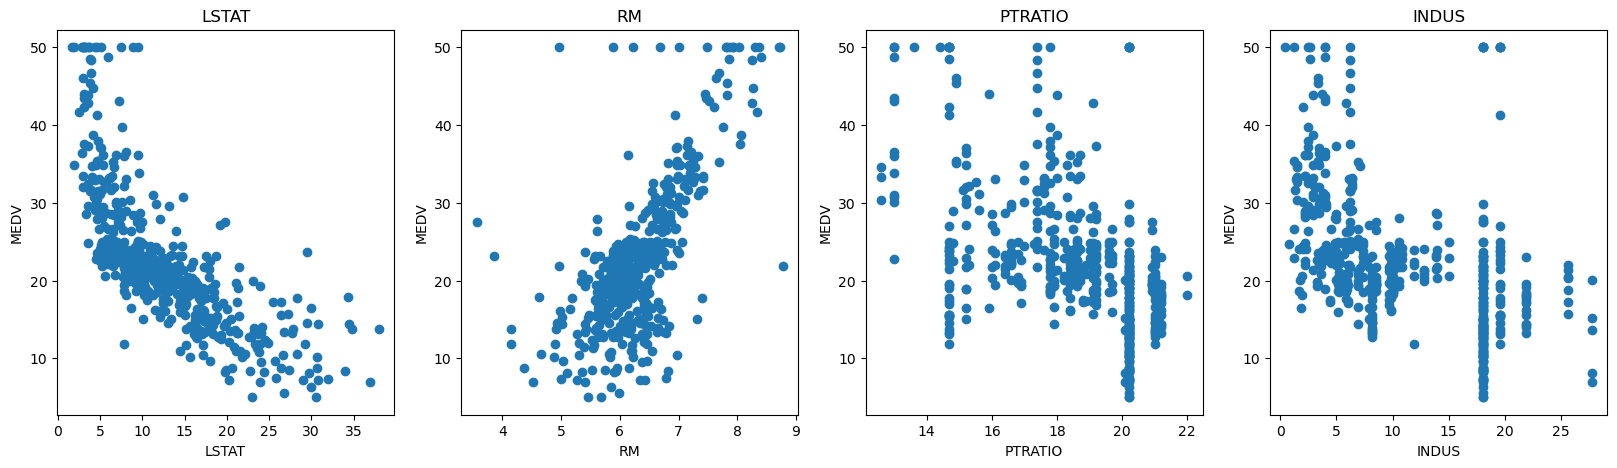

In [7]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Now applying linear regression only on features with high correlation with MEDV

# now exploring relationship of every variable with target varraible

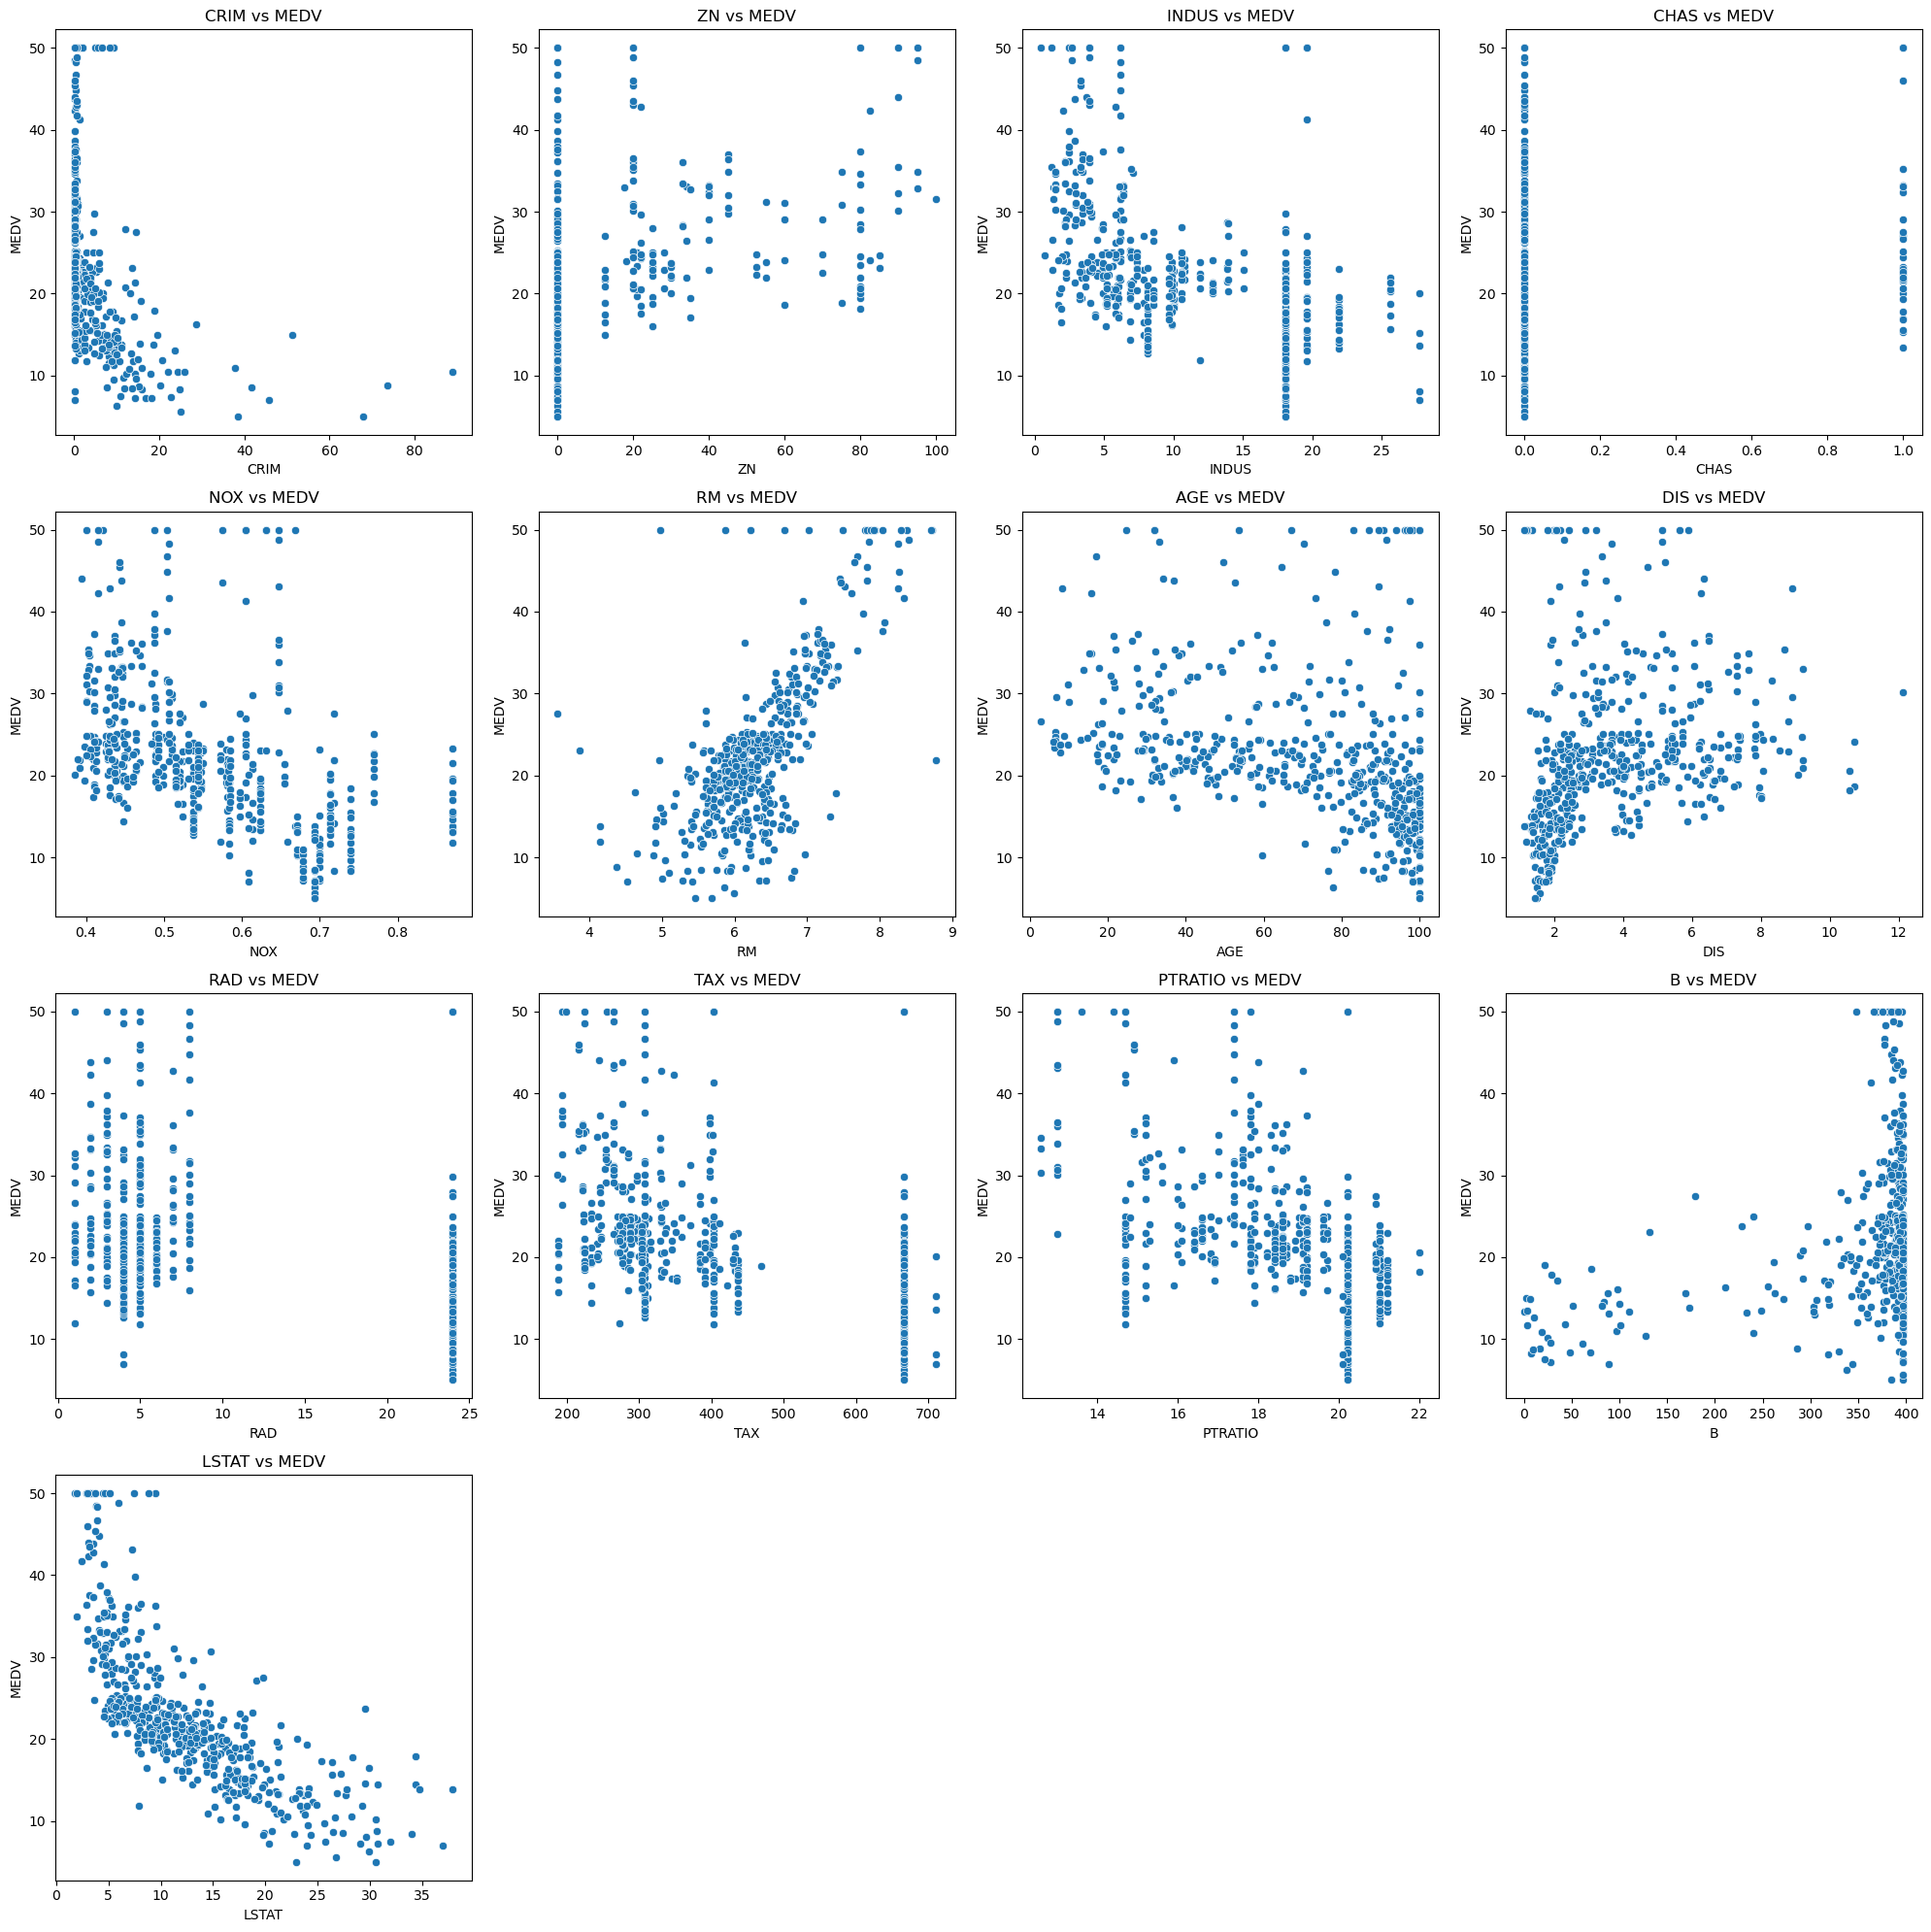

In [8]:
# Assuming df is your DataFrame and target_variable is the column name of your target variable
target_variable = 'MEDV'
features = df.columns.drop(target_variable)

# Setting up the matplotlib figure with a 4x4 grid
plt.figure(figsize=(20, 20))

# Plotting each feature against the target variable
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)  # Adjusted to a 4x4 grid
    sns.scatterplot(x=df[feature], y=df[target_variable])
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

plt.tight_layout()
plt.show()

The scatter plots above illustrate the relationship of each variable in the Boston Housing Dataset with the target variable MEDV (Median value of owner-occupied homes in $1000's). These plots can provide insights into the nature of the relationships, such as linearity, patterns, and potential outliers.

Linear Relationships: Some variables like RM (average number of rooms per dwelling) show a clear linear relationship with MEDV.
Non-Linear Relationships: Other variables may exhibit non-linear relationships. For instance, CRIM (per capita crime rate by town) and LSTAT (percentage lower status of the population) seem to have non-linear relationships with MEDV.
Outliers: The plots also highlight potential outliers. For example, CRIM and RM show several points that deviate significantly from the general trend.
Categorical Variables: For the CHAS variable (Charles River dummy variable), the scatter plot essentially shows two distinct groups, corresponding to whether the tract bounds the river or not.

In [9]:
# Re-importing necessary libraries and modules as the code execution state was reset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd



# Selecting features (excluding 'MEDV') and the target variable 'MEDV'
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The setup should now be correct
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # Displaying the shapes of the split data




((404, 13), (102, 13), (404,), (102,))

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Re-building the Linear Regression model
model = LinearRegression()

# Training the Linear Regression model
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.291119474973613
R-squared: 0.6687594935356307


Multicolinearty check

This has to be done before transformation and scaling

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming your DataFrame is named df
# Exclude non-numeric columns and the target variable 'MEDV'
numeric_columns = df.select_dtypes(include=[np.number]).columns.drop('MEDV')

# Add a constant to the DataFrame for the intercept
df_numeric_with_constant = add_constant(df[numeric_columns])

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = df_numeric_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(df_numeric_with_constant.values, i) for i in range(df_numeric_with_constant.shape[1])]

print(vif_data)

    Feature         VIF
0     const  585.265238
1      CRIM    1.792192
2        ZN    2.298758
3     INDUS    3.991596
4      CHAS    1.073995
5       NOX    4.393720
6        RM    1.933744
7       AGE    3.100826
8       DIS    3.955945
9       RAD    7.484496
10      TAX    9.008554
11  PTRATIO    1.799084
12        B    1.348521
13    LSTAT    2.941491


Correlation between RAD and TAX: 0.9102281885331845


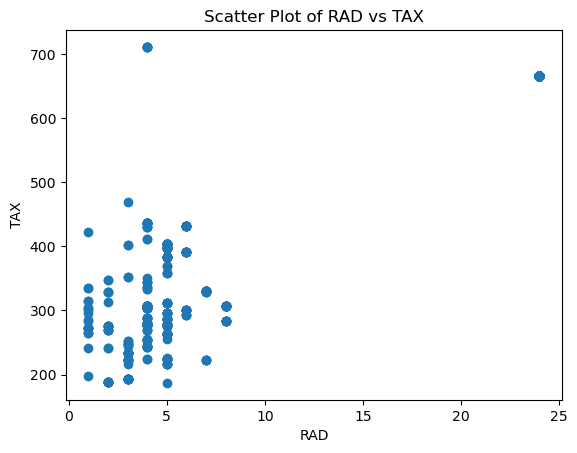

Model performance (MSE): 64.43836499191248
   Feature         VIF
0    const   50.043298
1      RAD  123.461450
2      TAX    8.995344
3  RADxTAX  156.913737


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Analyzing the relationship
correlation = df['RAD'].corr(df['TAX'])
print("Correlation between RAD and TAX:", correlation)

# Scatter plot
plt.scatter(df['RAD'], df['TAX'])
plt.xlabel('RAD')
plt.ylabel('TAX')
plt.title('Scatter Plot of RAD vs TAX')
plt.show()

# Creating a new combined feature (example: product of RAD and TAX)
df['RADxTAX'] = df['RAD'] * df['TAX']

# Model assessment with the new feature
X = df[['RAD', 'TAX', 'RADxTAX']]  # Include other predictors as needed
y = df['MEDV']  # Replace with your actual target variable
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
print("Model performance (MSE):", mean_squared_error(y, y_pred))

# VIF recalculation
df_with_constant = add_constant(df[['RAD', 'TAX', 'RADxTAX']])
vif_data = pd.DataFrame()
vif_data['Feature'] = df_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

In [13]:
# Checking for missing values
missing_values = df.isnull().sum()
# Data types
data_types = df.dtypes
missing_values, data_types

(CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
 RADxTAX    0
 dtype: int64,
 CRIM       float64
 ZN         float64
 INDUS      float64
 CHAS         int64
 NOX        float64
 RM         float64
 AGE        float64
 DIS        float64
 RAD          int64
 TAX          int64
 PTRATIO    float64
 B          float64
 LSTAT      float64
 MEDV       float64
 RADxTAX      int64
 dtype: object)

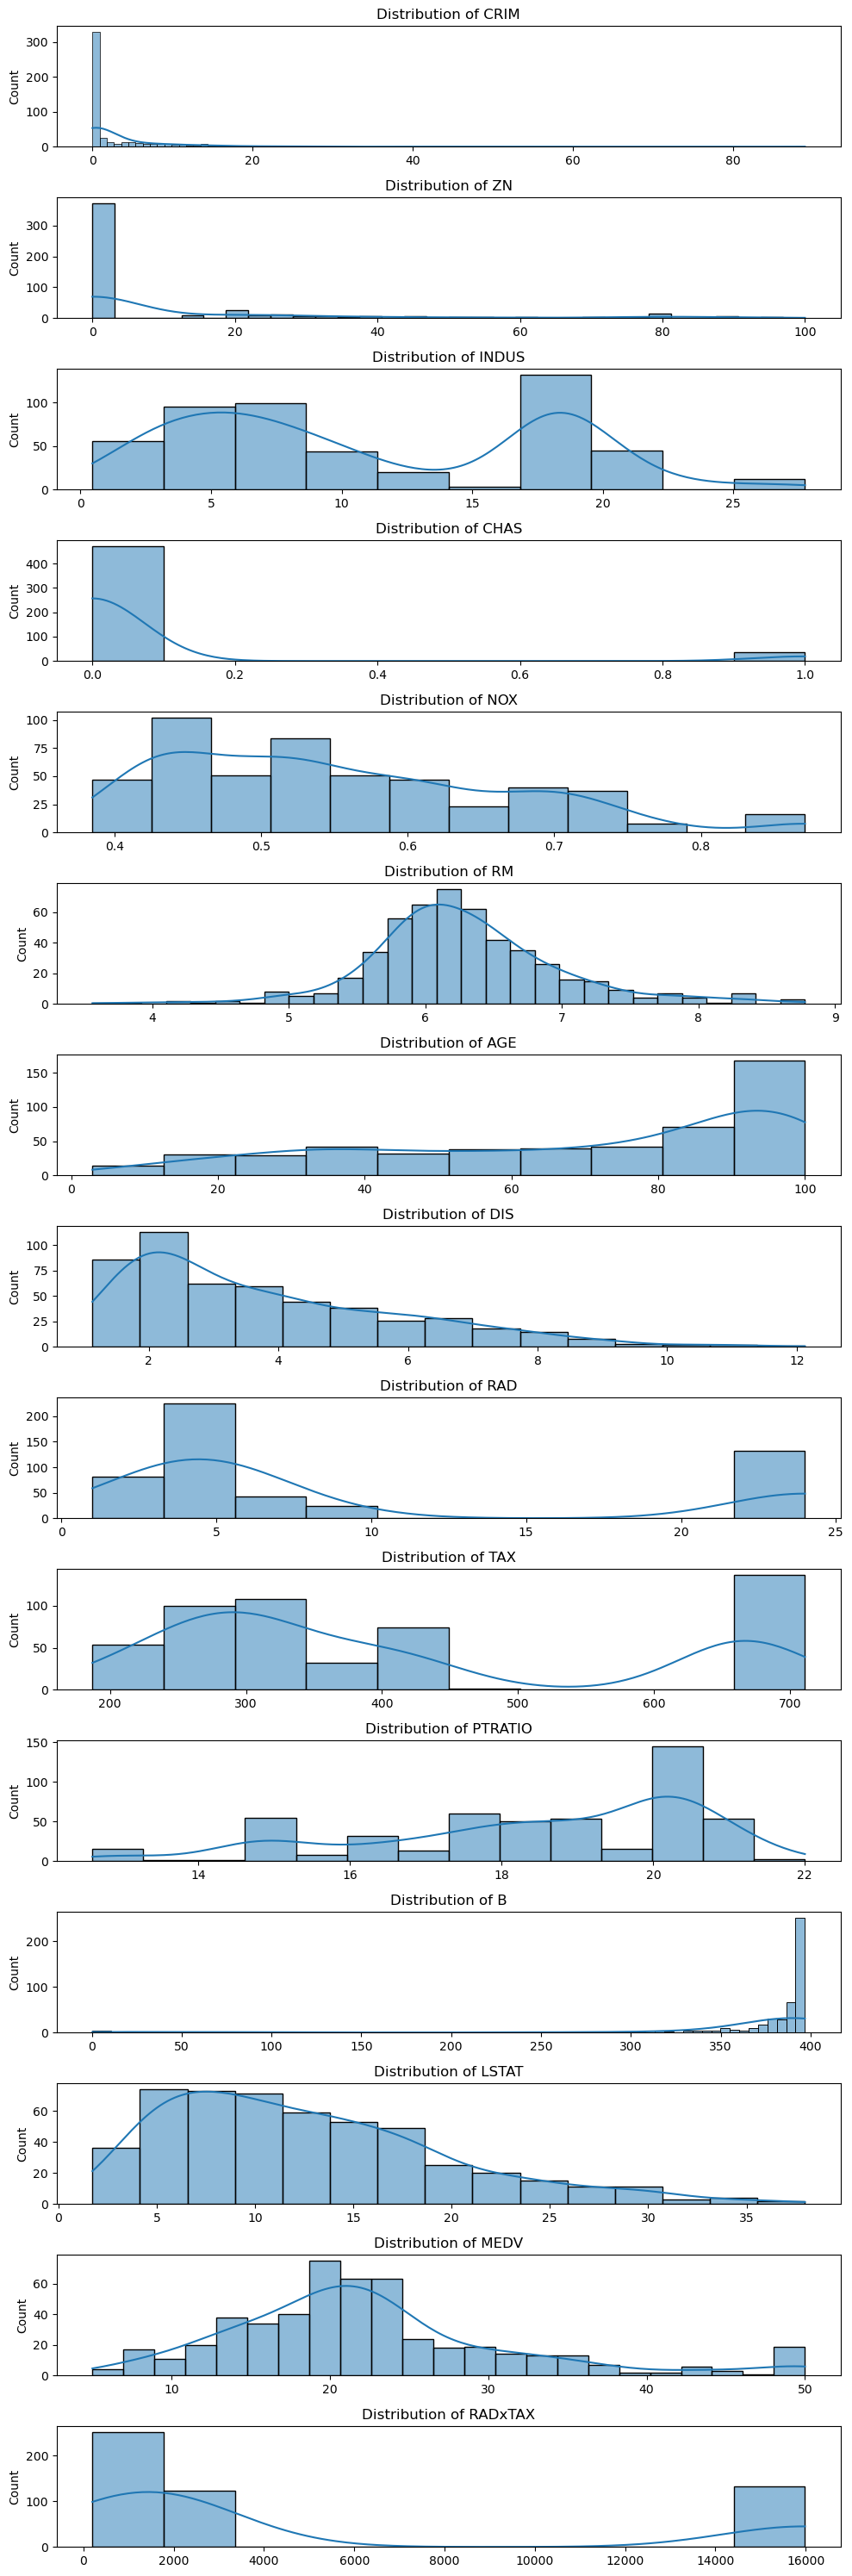

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
MEDV       40
RADxTAX     0
dtype: int64

In [14]:
# Detecting outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# Plotting distributions for each attribute
num_columns = df.columns.size
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 2*num_columns))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

outliers

Distribution of Each Attribute:
CRIM, ZN, B: These attributes are positively skewed, indicating a concentration of values at the lower end.
CHAS: This is a categorical variable (binary), so its histogram represents the count of each category.
RM, MEDV: These appear relatively normally distributed but with some skewness and outliers.
AGE, DIS, LSTAT: These attributes are somewhat skewed, with variations in their distributions.
RAD, TAX: These show a bimodal or multi-modal distribution, indicating different groups within the data.
PTRATIO: Shows a slight skewness with a concentration of values at the higher end.

Outliers (Count per Attribute):

CRIM: 66 outliers
ZN: 68 outliers
CHAS: 35 outliers (Note: This is a binary variable, so 'outliers' might just represent one category)
RM: 30 outliers
DIS: 5 outliers
PTRATIO: 15 outliers
B: 77 outliers
LSTAT: 7 outliers
MEDV: 40 outliers
INDUS, NOX, AGE, RAD, TAX: No significant outliers detected

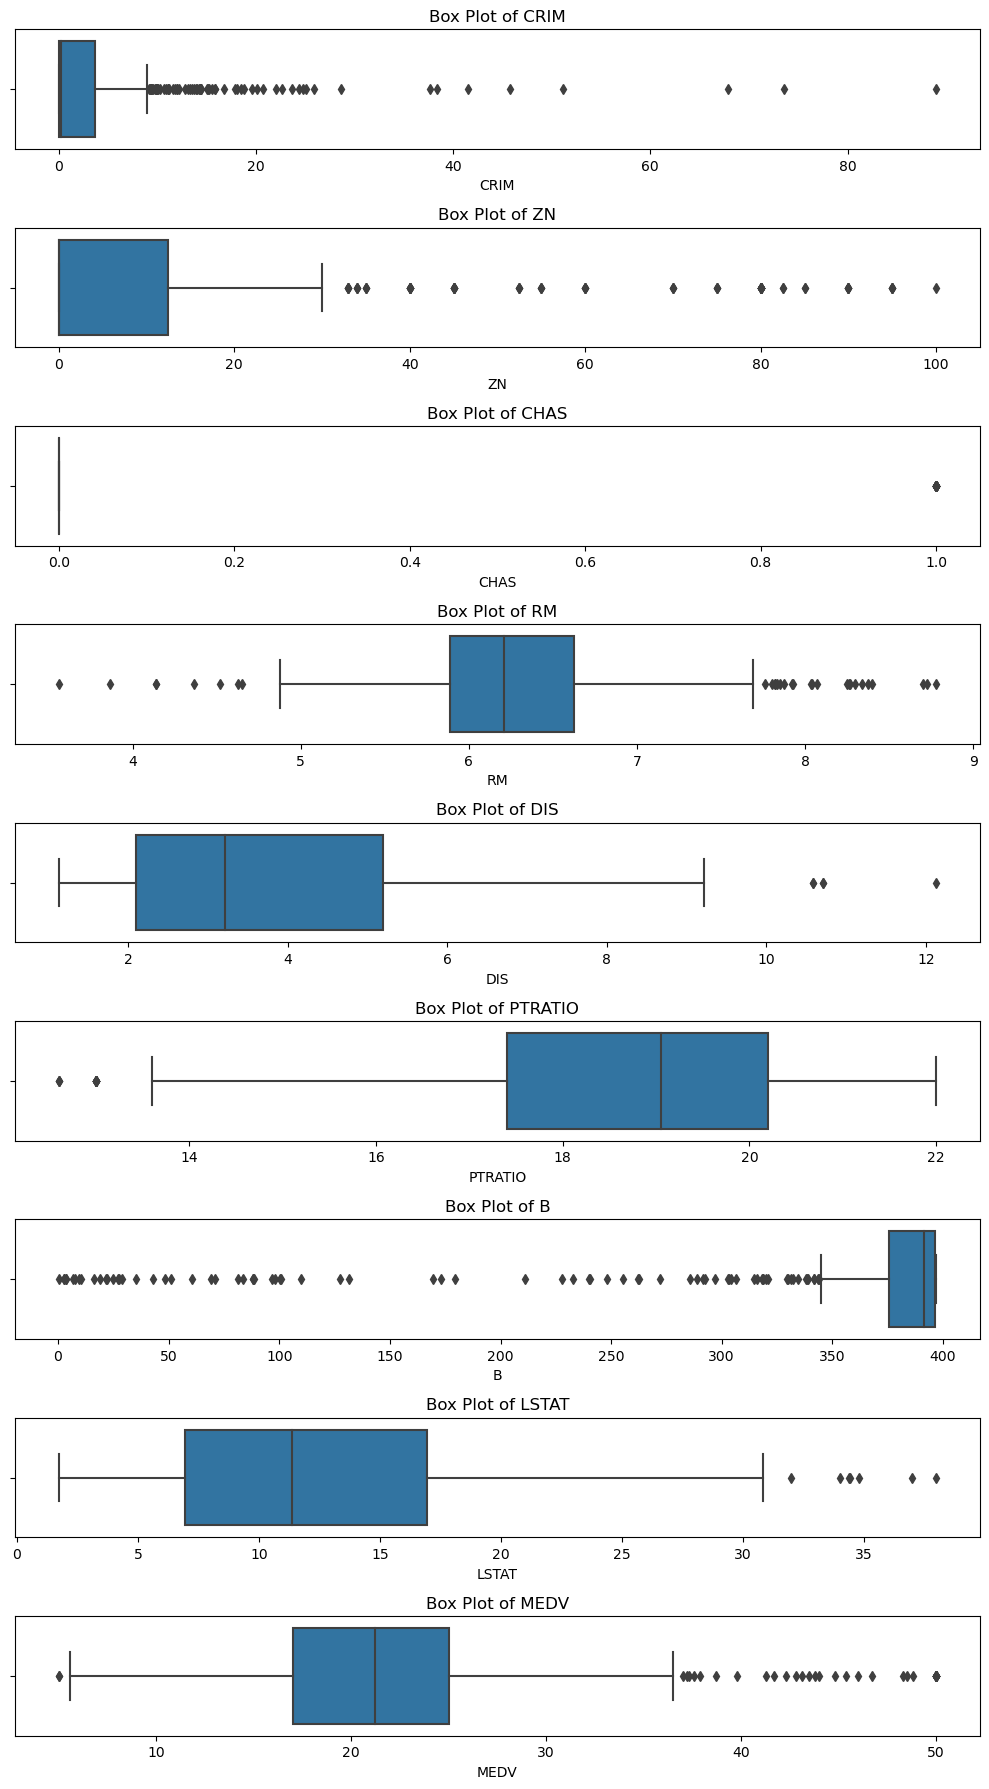

In [15]:
# Plotting box plots for features with outliers
features_with_outliers = ['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
num_outlier_features = len(features_with_outliers)
fig, axes = plt.subplots(nrows=num_outlier_features, ncols=1, figsize=(10, 2 * num_outlier_features))

for i, col in enumerate(features_with_outliers):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [16]:
# Since 'ZN' has many zero values, we'll use three bins and handle the zero values separately
df['ZN_binned'] = pd.cut(df['ZN'], bins=[-1, 0, 25, 100], labels=['Zero', 'Low', 'High'])

# Re-applying the binning for other columns
df['CRIM_binned'] = pd.qcut(df['CRIM'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['RM_binned'] = pd.qcut(df['RM'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])
df['B_binned'] = pd.qcut(df['B'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['LSTAT_binned'] = pd.qcut(df['LSTAT'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Displaying the first few rows of the dataset with the new binned columns
df[['CRIM', 'CRIM_binned', 'ZN', 'ZN_binned', 'RM', 'RM_binned', 'B', 'B_binned', 'LSTAT', 'LSTAT_binned']].head()

,CRIM,CRIM_binned,ZN,ZN_binned,RM,RM_binned,B,B_binned,LSTAT,LSTAT_binned
0,0.00632,Low,18.0,Low,6.575,Large,396.90,Very High,4.98,Low
1,0.02731,Low,0.0,Zero,6.421,Large,396.90,Very High,9.14,Medium
2,0.02729,Low,0.0,Zero,7.185,Very Large,392.83,High,4.03,Low
3,0.03237,Low,0.0,Zero,6.998,Very Large,394.63,High,2.94,Low
4,0.06905,Low,0.0,Zero,7.147,Very Large,396.90,Very High,5.33,Low


In [17]:
# Binning the specified columns
columns_to_bin = ['CRIM', 'ZN', 'B', 'LSTAT', 'RM']
binned_data = df.copy()

# Using quantile-based binning
for col in columns_to_bin:
    binned_data[col+'_binned'] = pd.qcut(df[col], q=4, duplicates='drop')  # 4 quantiles

# Displaying the first few rows of the dataset with binned columns
binned_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RADxTAX,ZN_binned,CRIM_binned,RM_binned,B_binned,LSTAT_binned
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,296,"(12.5, 100.0]","(0.00532, 0.082]","(6.208, 6.624]","(396.225, 396.9]","(1.729, 6.95]"
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,484,"(-0.001, 12.5]","(0.00532, 0.082]","(6.208, 6.624]","(396.225, 396.9]","(6.95, 11.36]"
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,484,"(-0.001, 12.5]","(0.00532, 0.082]","(6.624, 8.78]","(391.44, 396.225]","(1.729, 6.95]"
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,666,"(-0.001, 12.5]","(0.00532, 0.082]","(6.624, 8.78]","(391.44, 396.225]","(1.729, 6.95]"
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,666,"(-0.001, 12.5]","(0.00532, 0.082]","(6.624, 8.78]","(396.225, 396.9]","(1.729, 6.95]"


CRIM_binned: Bins of per capita crime rate by town.
ZN_binned: Bins of proportion of residential land zoned for lots over 25,000 sq.ft.
B_binned: Bins of 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
LSTAT_binned: Bins of percentage lower status of the population.
RM_binned: Bins of average number of rooms per dwelling.

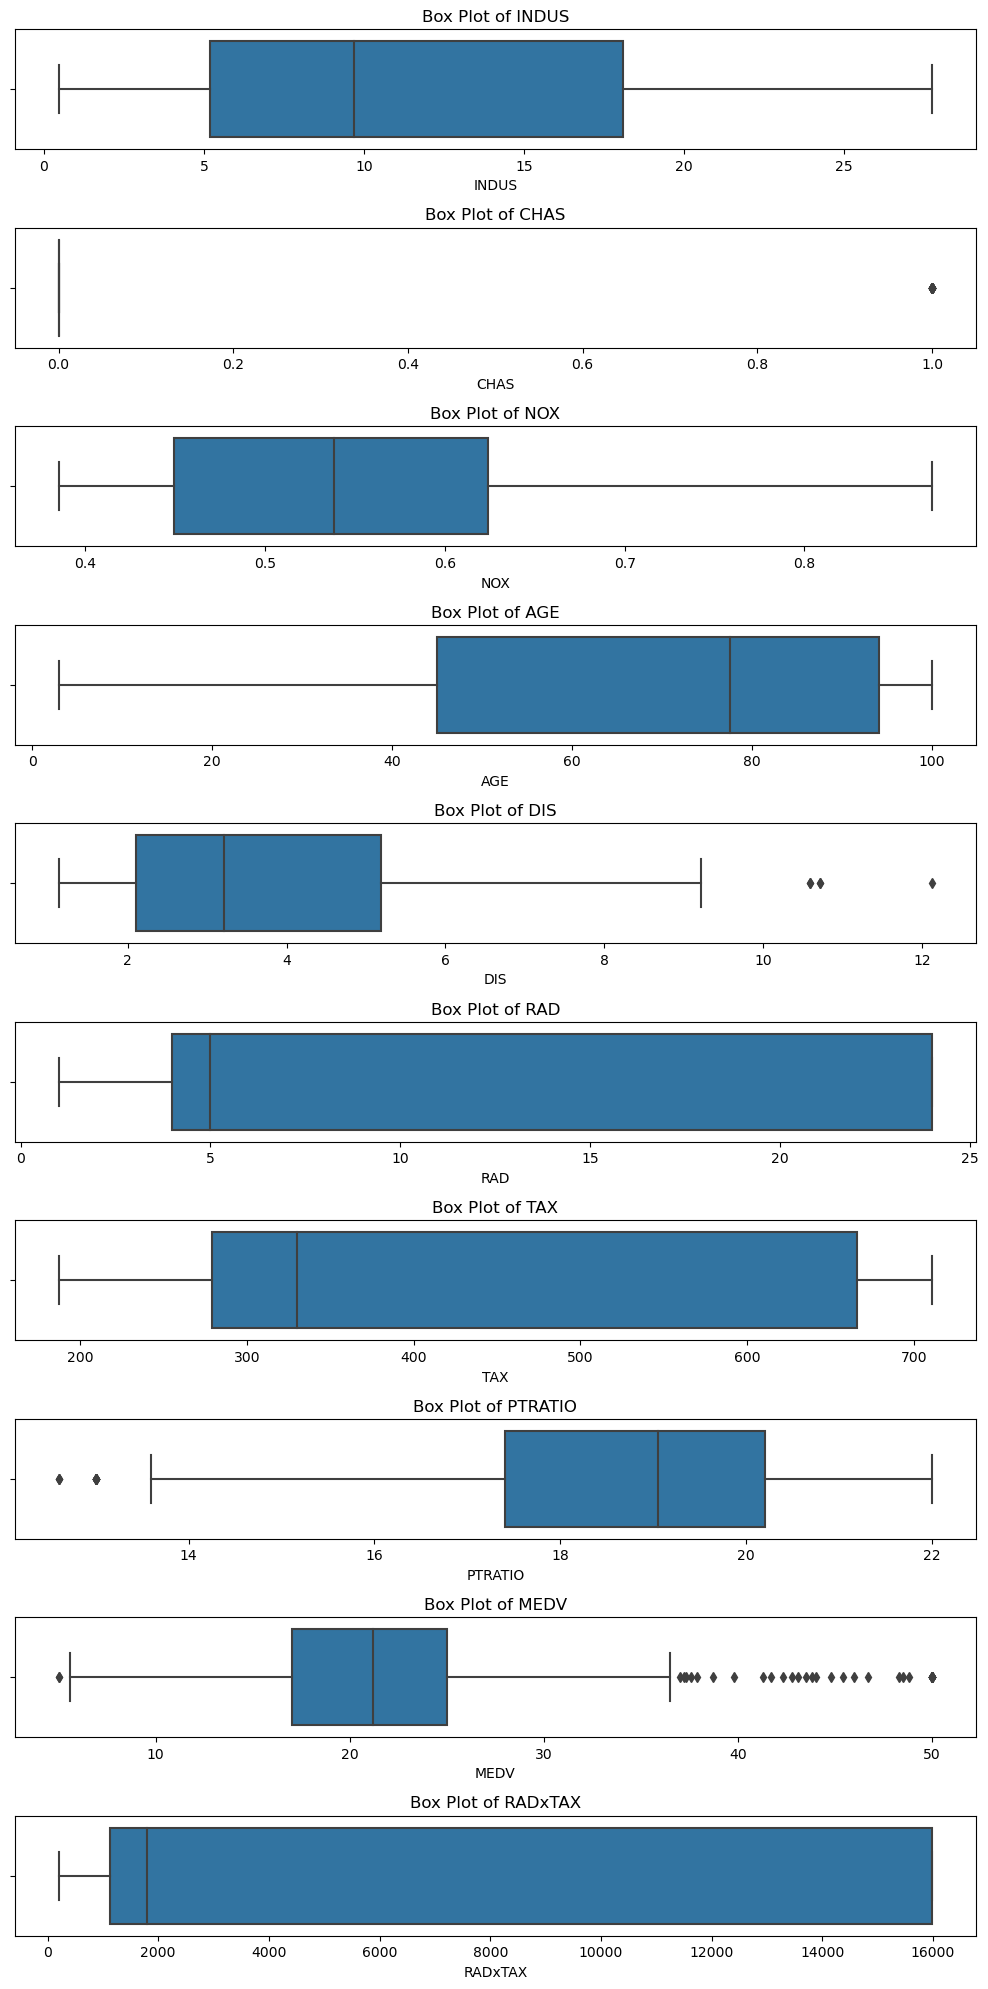

In [18]:
# Identifying columns for which to plot box plots, excluding the binned columns
columns_to_exclude = ['CRIM', 'ZN', 'B', 'LSTAT', 'RM'] + [col+'_binned' for col in columns_to_bin]
columns_for_box_plots = [col for col in df.columns if col not in columns_to_exclude]

# Plotting box plots for the selected columns
num_columns = len(columns_for_box_plots)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 2*num_columns))

for i, col in enumerate(columns_for_box_plots):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

You can observe the range, median, and any outliers in these features, which include:

INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX: Nitric oxides concentration (parts per 10 million)
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centres
RAD: Index of accessibility to radial highways
TAX: Full-value property-tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
MEDV: Median value of owner-occupied homes in $1000's

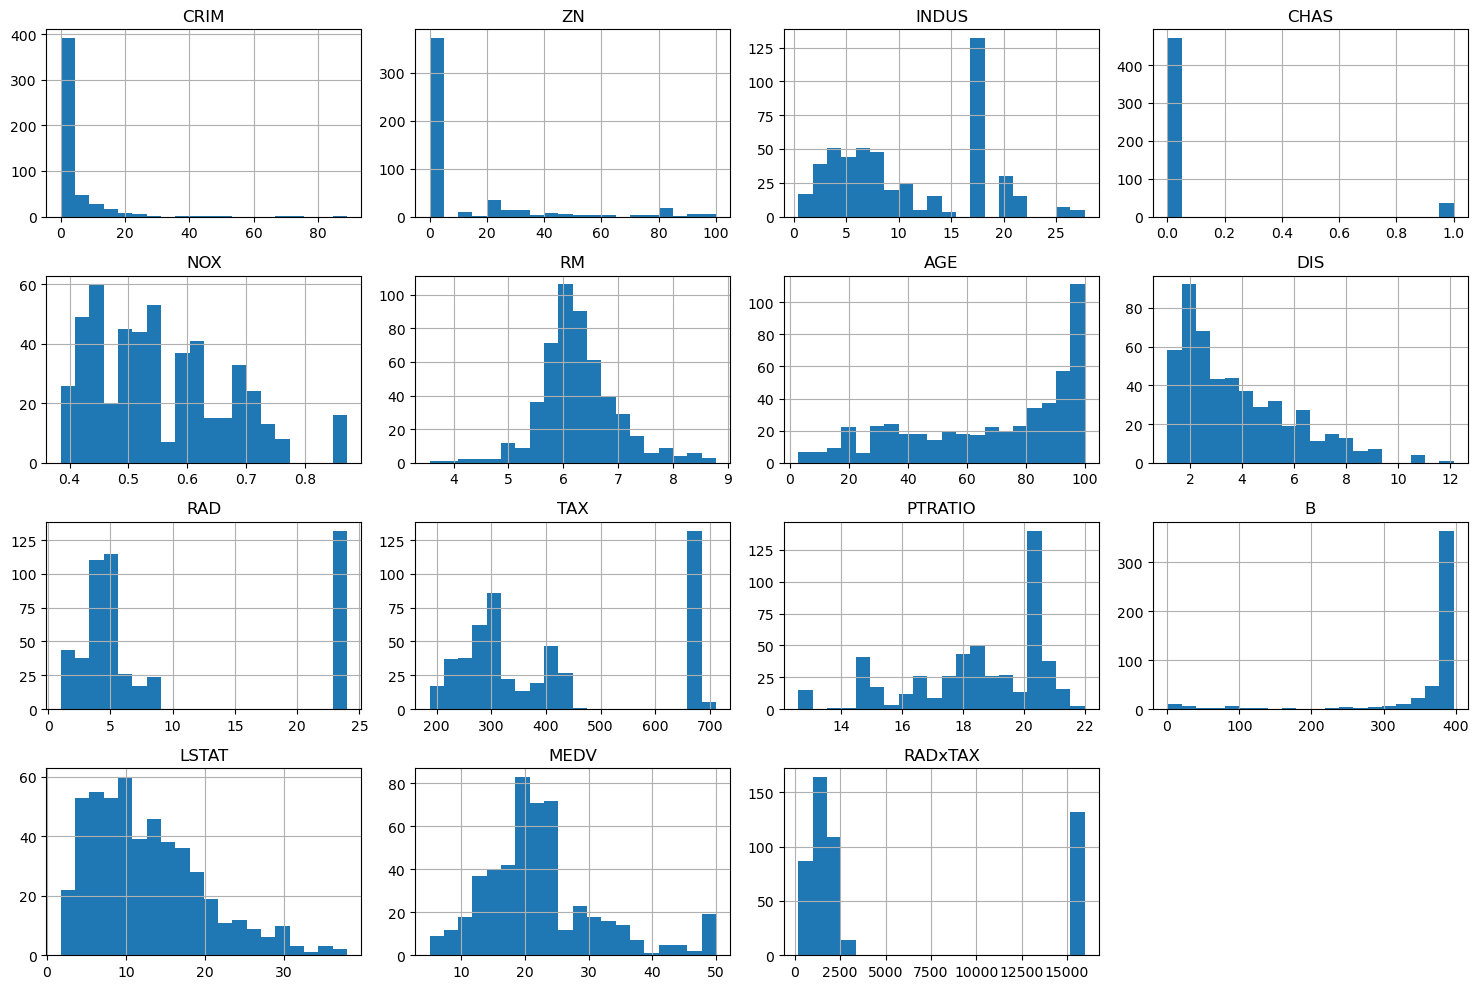

In [19]:
#Data Scaling

#Now deciding whether to scale data through standardization or normlization
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

Except for RM column, data does not seem to be normally distributed, so let's apply normalization to rest of the columns and standardization to RM column

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating MinMaxScaler and StandardScaler objects
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

# Identifying numeric columns for normalization (excluding 'RM' and any non-numeric columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
columns_to_normalize = [col for col in numeric_columns if col != 'RM']

# Applying normalization to the non-Gaussian distributed numeric columns
df[columns_to_normalize] = min_max_scaler.fit_transform(df[columns_to_normalize])

# Applying standardization to the 'RM' column (Gaussian distributed)
df['RM'] = std_scaler.fit_transform(df[['RM']])

# Now, df contains the normalized and standardized values

In [21]:
df.isnull().sum()

CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
RADxTAX         0
ZN_binned       0
CRIM_binned     0
RM_binned       0
B_binned        0
LSTAT_binned    0
dtype: int64

In [22]:
# Since 'ZN' has many zero values, we'll use three bins and handle the zero values separately
df['ZN_binned'] = pd.cut(df['ZN'], bins=[-1, 0, 25, 100], labels=['Zero', 'Low', 'High'])

# Re-applying the binning for other columns
df['CRIM_binned'] = pd.qcut(df['CRIM'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['RM_binned'] = pd.qcut(df['RM'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])
df['B_binned'] = pd.qcut(df['B'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['LSTAT_binned'] = pd.qcut(df['LSTAT'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Displaying the first few rows of the dataset with the new binned columns
df[['CRIM', 'CRIM_binned', 'ZN', 'ZN_binned', 'RM', 'RM_binned', 'B', 'B_binned', 'LSTAT', 'LSTAT_binned']].head()

,CRIM,CRIM_binned,ZN,ZN_binned,RM,RM_binned,B,B_binned,LSTAT,LSTAT_binned
0,0.000000,Low,0.18,Low,0.413672,Large,1.000000,Very High,0.089680,Low
1,0.000236,Low,0.00,Zero,0.194274,Large,1.000000,Very High,0.204470,Medium
2,0.000236,Low,0.00,Zero,1.282714,Very Large,0.989737,High,0.063466,Low
3,0.000293,Low,0.00,Zero,1.016303,Very Large,0.994276,High,0.033389,Low
4,0.000705,Low,0.00,Zero,1.228577,Very Large,1.000000,Very High,0.099338,Low


C:\Users\Fatima Hassan\AppData\Local\Temp\ipykernel_8360\3572439995.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Fatima Hassan\AppData\Local\Temp\ipykernel_8360\3572439995.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Fatima Hassan\AppData\Local\Temp\ipykernel_8360\3572439995.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Fatima Hassan\AppData\Local\Temp\ipykernel_8360\3572439995.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Fatima Hassan\AppData\Local\Temp\ipykernel_8360\3572439995.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Fatima Hassan\AppData\Local\Temp\ipykernel_8360\3572439995.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Fatima Hassan\AppData\Local\Temp\ipykernel_8360\3572439995.py:13: UserWarning: The figure layout has ch

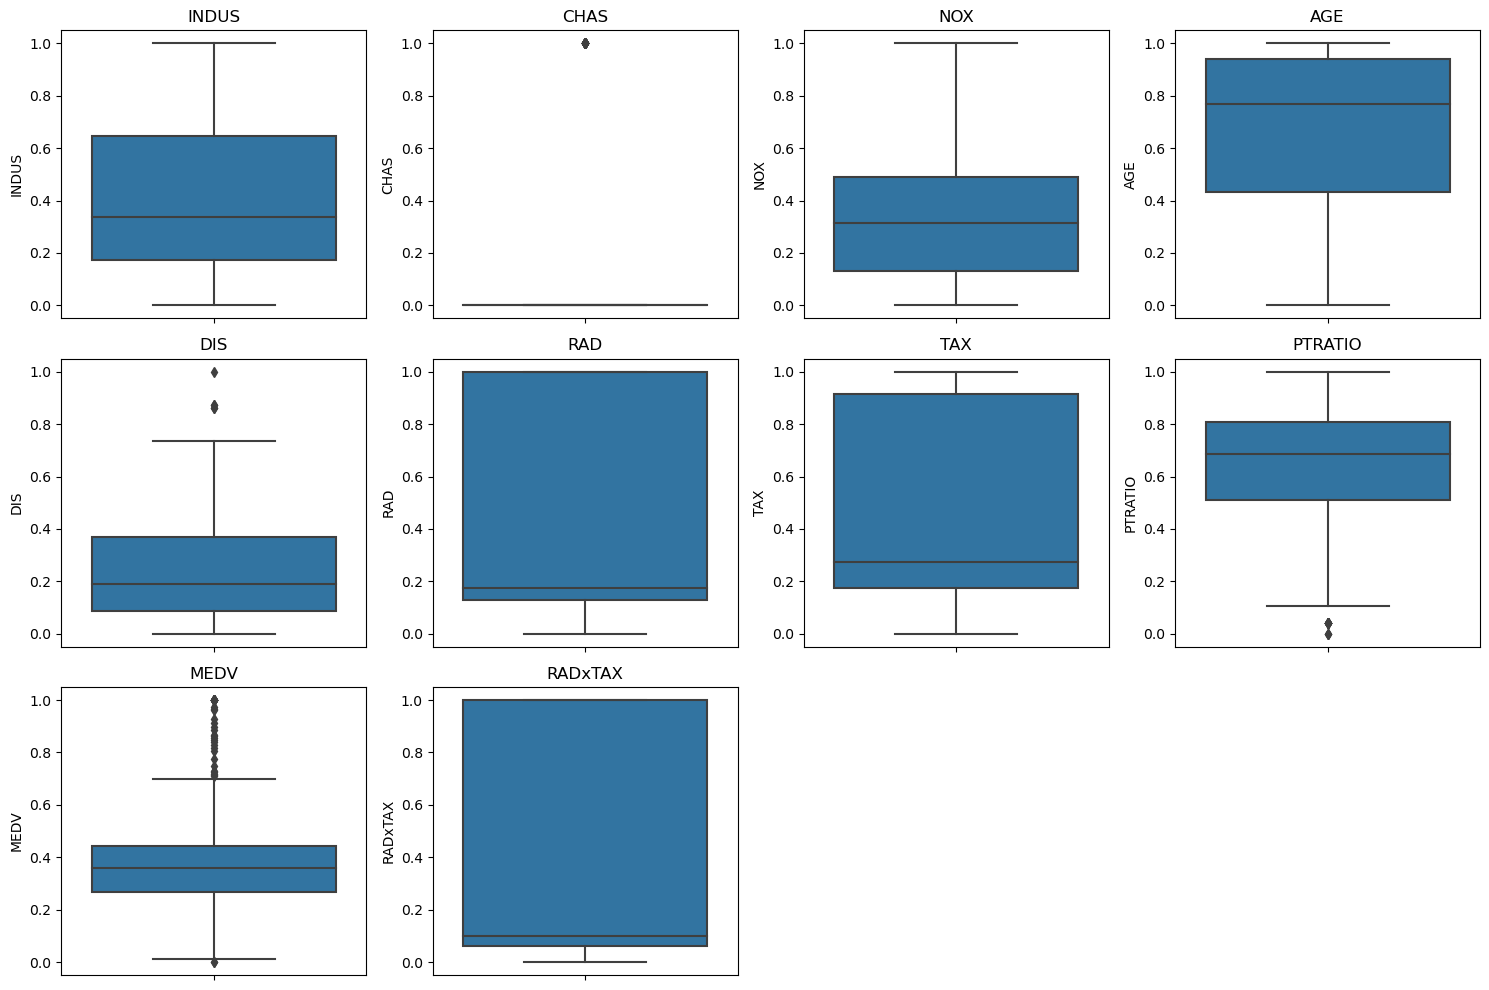

In [23]:
# Selecting the columns for the new boxplot analysis
excluded_columns = ['CRIM', 'ZN', 'RM', 'B', 'LSTAT', 'CRIM_binned', 'ZN_binned', 'RM_binned', 'B_binned', 'LSTAT_binned']
boxplot_columns = df.drop(columns=excluded_columns)

# Creating a new figure for the boxplots
plt.figure(figsize=(15, 10))

# Creating a boxplot for each remaining feature
for i, column in enumerate(boxplot_columns.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=boxplot_columns[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

There are very few outliers in the remaining columns let's just apply transformation

Label Encoding for 'RM_binned' and 'LSTAT_binned':